In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the tips dataset
df = sns.load_dataset("tips")

In [3]:
# Check sum of null values
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [4]:
# Exclude categorical columns for outlier detection
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [5]:
# Detect outliers
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)

In [6]:
# Remove outliers
df = df[~outliers]

In [8]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


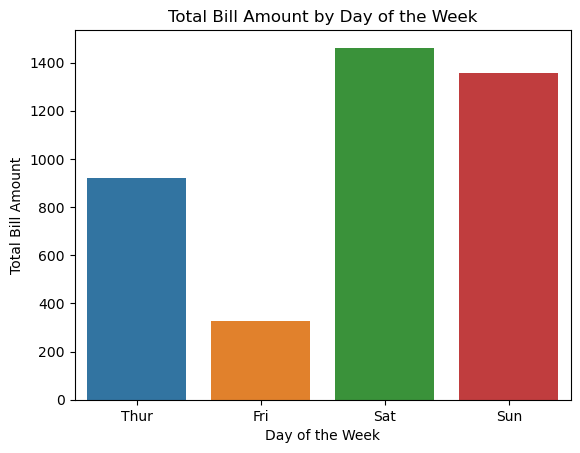

In [9]:
# Data analysis using visualization tools

# a.Which day of the week has the highest total bill amount?
total_bill_by_day = df.groupby('day')['total_bill'].sum().reset_index()
sns.barplot(x='day', y='total_bill', data=total_bill_by_day)
plt.title('Total Bill Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Bill Amount')
plt.show()

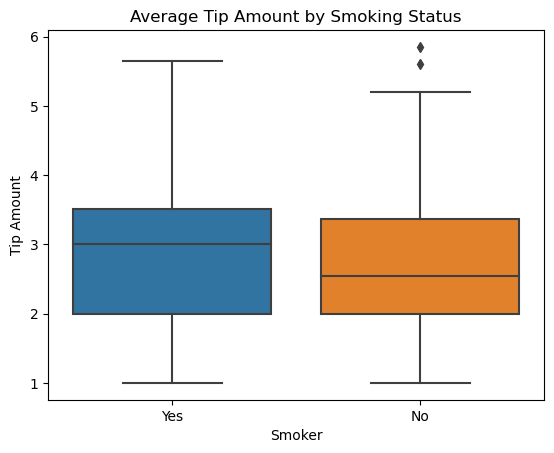

In [10]:
# b.Average tip amount given by smokers and non-smokers
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Average Tip Amount by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Tip Amount')
plt.show()

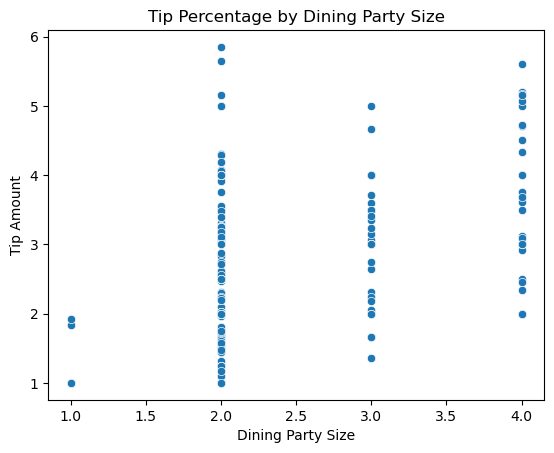

In [11]:
# c.Tip percentage variation based on dining party size
sns.scatterplot(x='size', y='tip', data=df)
plt.title('Tip Percentage by Dining Party Size')
plt.xlabel('Dining Party Size')
plt.ylabel('Tip Amount')
plt.show()

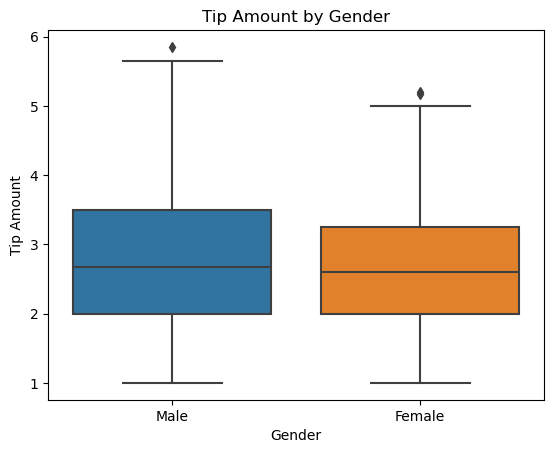

In [12]:
# d.Gender tendency to leave higher tips
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Tip Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Tip Amount')
plt.show()

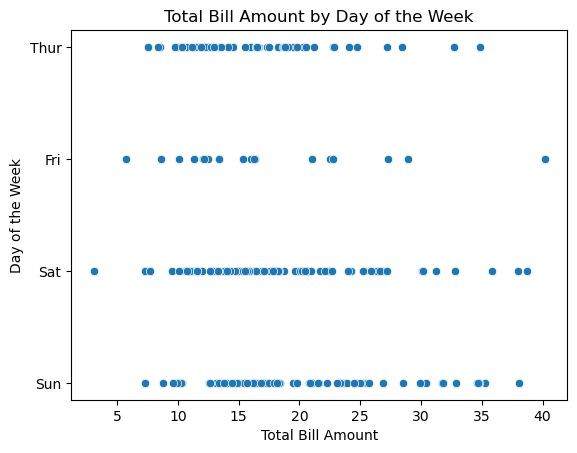

In [13]:
# e.Relationship between total bill amount and day of the week
sns.scatterplot(x='total_bill', y='day', data=df)
plt.title('Total Bill Amount by Day of the Week')
plt.xlabel('Total Bill Amount')
plt.ylabel('Day of the Week')
plt.show()

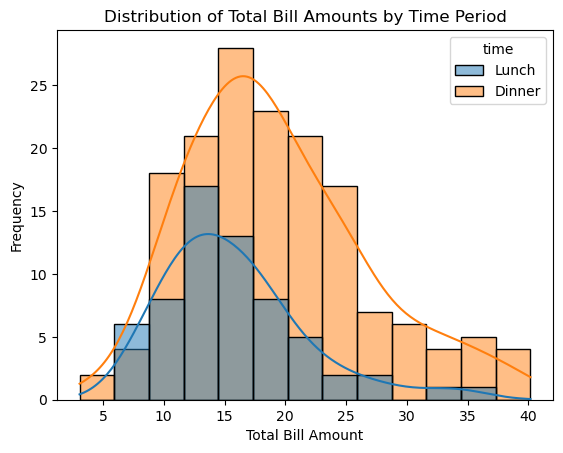

In [14]:
# f.Distribution of total bill amounts across different time periods
sns.histplot(x='total_bill', hue='time', data=df, kde=True)
plt.title('Distribution of Total Bill Amounts by Time Period')
plt.xlabel('Total Bill Amount')
plt.ylabel('Frequency')
plt.show()

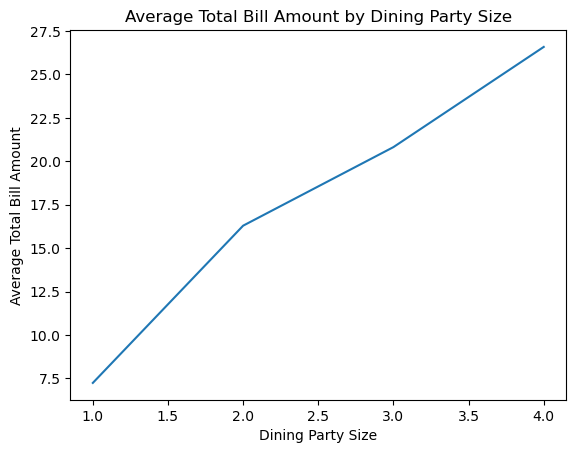

In [15]:
# g.Dining party size group with highest average total bill amount
average_total_bill_by_size = df.groupby('size')['total_bill'].mean().reset_index()
sns.lineplot(x='size', y='total_bill', data=average_total_bill_by_size)
plt.title('Average Total Bill Amount by Dining Party Size')
plt.xlabel('Dining Party Size')
plt.ylabel('Average Total Bill Amount')
plt.show()

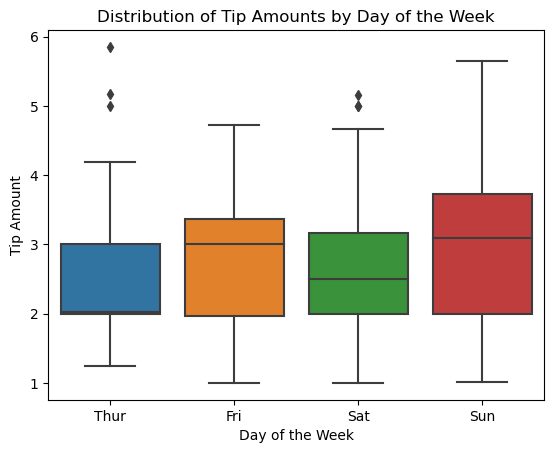

In [16]:
# h.Distribution of tip amounts for each day of the week
sns.boxplot(x='day', y='tip', data=df)
plt.title('Distribution of Tip Amounts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.show()

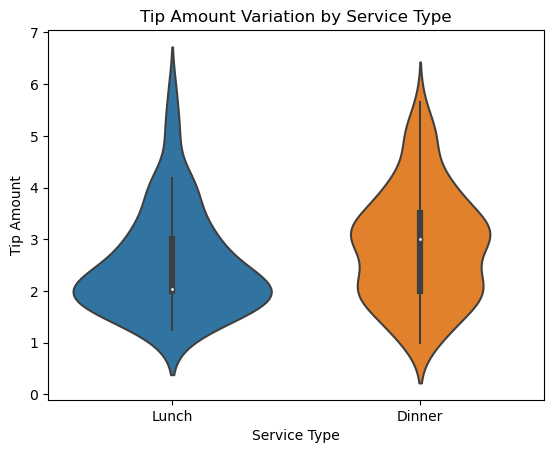

In [17]:
# i.Tip amount variation based on type of service
sns.violinplot(x='time', y='tip', data=df)
plt.title('Tip Amount Variation by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Tip Amount')
plt.show()

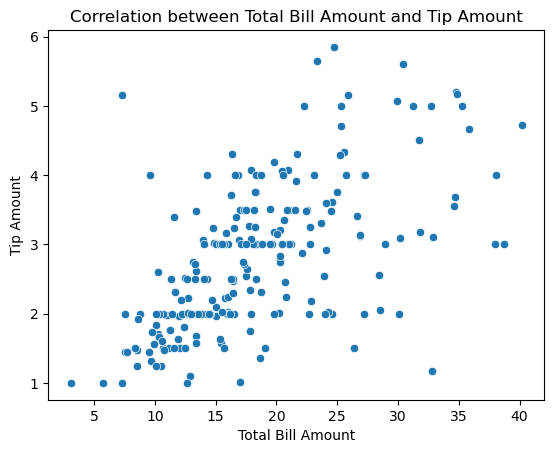

In [18]:
# j.Correlation between total bill amount and tip amount
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Correlation between Total Bill Amount and Tip Amount')
plt.xlabel('Total Bill Amount')
plt.ylabel('Tip Amount')
plt.show()